<a href="https://colab.research.google.com/github/attilalr/Material_Curso_Python_LPM_UFRGS/blob/main/Example_pygeostat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Python script Pygeostat example in Colaboratory Google.

### The objective is to replicate some examples seen in http://www.ccgalberta.com/pygeostat/examples.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, shutil, sys

try:
  import pygeostat as gs
except:
  !pip3 install pygeostat
  import pygeostat as gs

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
work_folder = '/content/temp_folder'

### Getting and setting up the executables

The next cell will download the gslib executables and chmod +x all files in the executable folder.

In [3]:
# download the executables
gs.get_executable()

# to retrieve the executables folder lets find a previous known program [maybe there is a routine in pygeostat to get the folder]
example_prog = 'kt3d'

string_path_exec = os.popen('find /usr/local/lib -name \''+example_prog+'\'|head -n1').read()
string_path_exec = '/'.join(string_path_exec.split('/')[:-1])+'/'
print ('Executables folder: {}'.format(string_path_exec))

string_cmd = 'chmod +x '+string_path_exec+'*'
print ('Alterando permissão de execução: {}'.format(string_cmd))
os.system(string_cmd)

print ('Files under the executables folder:')
for file_ in os.listdir(string_path_exec):
  print (file_)

The software is available under gslib license agreement (http://www.gslib.com)
Executables folder: /usr/local/lib/python3.7/dist-packages/pygeostat/executable/
Alterando permissão de execução: chmod +x /usr/local/lib/python3.7/dist-packages/pygeostat/executable/*
Files under the executables folder:
sisim_gs
sisim
pixelplt
Info.txt
backtr
ellipsim
probplt
locmap
bicalib
declus
trans
varmap
ik3d
addcoord
lusim
gamv
postik
nscore
pfsim
rotcoord
gtsim
vargplt
scatplt
anneal
vmodel
histsmth
sasim
cokb3d
histplt
kb2d
scatsmth
draw
qpplt
bigaus
postsim
sgsim
gam
bivplt
sisim_lm
plotem
kt3d


Setting work folder.

In [4]:
try:
    os.mkdir(work_folder)
    print("Folder {} created.".format(work_folder)) 
except FileExistsError:
    print("Folder {} already exists.".format(work_folder)) 


Folder /content/temp_folder already exists.


In the next cell we are going to copy an example data to the work folder and open it.

In [5]:
example_datafile = 'point2d_surf'

# Lets put the data file in the work folder
dfl = gs.ExampleData(example_datafile)
shutil.copy(dfl.flname, work_folder)
print ('Files list in work folder {}:'.format(work_folder))
print (os.listdir(work_folder))

dfl = gs.DataFile(flname=work_folder+'/'+example_datafile+'.dat')

datafile_name = example_datafile+'.dat'

Files list in work folder /content/temp_folder:
['point2d_surf.dat', 'nscore.trn', 'nscore.out']


### Lets 'see' the data first

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


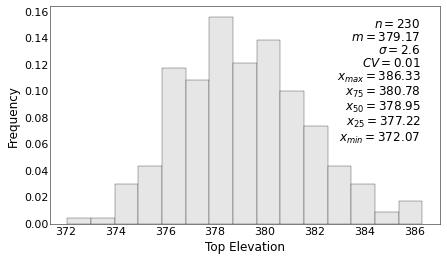

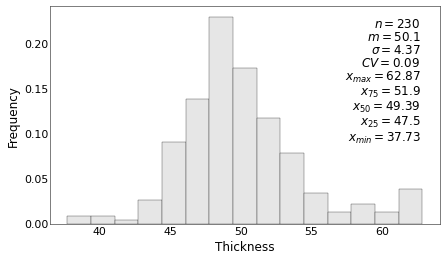

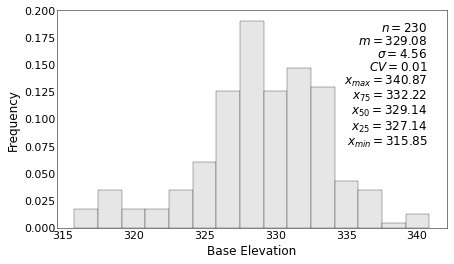

In [6]:
for var in dfl.variables:
    gs.histogram_plot(dfl, var=var, figsize = (7,4))

### Executing the first gslib program: nscore

Now it is time to execute a gslib program. The first step is to define the procedure to get the blank parameters file.

In [7]:
# choose the program
program = 'nscore'

# execute via system call
string_cmd = f'echo \'\'|{string_path_exec}{program}'
print (string_cmd)
print (os.popen(string_cmd).read())

# display the template parameter file
print ()
print ('### Copy the parameter file content below ###')
!cat /content/{program}.par

echo ''|/usr/local/lib/python3.7/dist-packages/pygeostat/executable/nscore

 NSCORE Version: 3.000

 Which parameter file do you want to use?
  data file = ../data/cluster.dat                     
  columns =  3 5
  trimming limits =  -1.E+21 1.E+21
  consider a different ref. dist. (1=yes) =  0
  file with reference distribution = ../histsmth/histsmth.out -              
  columns =  1 2
  file for output = nscore.out                              
  file for transformation table = nscore.trn                              
 ERROR: ../data/cluster.dat                                                                                                                                                                                                                                                                                                                                                                                                                                                             

Now we copy the parstring from the last cell's output.
At the time of writing this script the disponible nscore software accept just one column at time.

Although it is easy to normal score all the desired columns using pandas we are going to continue to demonstrate how to execute a gslib program.

In [8]:
nscore_p = gs.Program(program = 'nscore')

# parstring fields to fill in

# input
datafile_name = os.path.join(work_folder, dfl.flname)

# parameters
tmin = gs.Parameters['data.tmin']
column = 4

# nscore output filenames
nscore_outfl = os.path.join(work_folder, 'nscore.out')
trnfl = os.path.join(work_folder, 'nscore.trn')

parstr = f"""
                  Parameters for NSCORE
                  *********************

START OF PARAMETERS:
{datafile_name}      -file with data
{column}   0              -  columns for variable and weight
{tmin}   1.0e21         -  trimming limits
0                        -1=transform according to specified ref. dist.
nofile.out -  file with reference dist.
1   2                    -  columns for variable and weight
{nscore_outfl}               -file for output
{trnfl}               -file for output transformation table
"""

print (parstr)

nscore_p.run(parstr=parstr, quiet=False, liveoutput=True)

Unable to find the provided program! Trying to use the executable pool shipped with pygeostat!

                  Parameters for NSCORE
                  *********************

START OF PARAMETERS:
/content/temp_folder/point2d_surf.dat      -file with data
4   0              -  columns for variable and weight
-998.0   1.0e21         -  trimming limits
0                        -1=transform according to specified ref. dist.
nofile.out -  file with reference dist.
1   2                    -  columns for variable and weight
/content/temp_folder/nscore.out               -file for output
/content/temp_folder/nscore.trn               -file for output transformation table

Calling:  ['/usr/local/lib/python3.7/dist-packages/pygeostat/executable/nscore', 'temp']

 NSCORE Version: 3.000

  data file = /content/temp_folder/point2d_surf.dat   
  columns =  4 0
  trimming limits =  -998. 1.E+21
  consider a different ref. dist. (1=yes) =  0
  file with reference distribution = nofile.out -          

In [9]:
# open the nscore output data
dfl_ns = gs.DataFile(nscore_outfl)
print (dfl_ns.flname)
dfl_ns.head()

/content/temp_folder/nscore.out


,HoleID,X,Y,Top Elevation,Thickness,Base Elevation,NS:Top Elevation
0,3.0,405.63,2135.75,376.69,47.98,328.71,-0.93038
1,5.0,235.89,1865.70,379.69,51.00,328.69,0.24772
2,6.0,325.03,2055.81,376.86,49.34,327.52,-0.81855
3,7.0,675.54,2195.25,381.49,48.75,332.74,0.88111
4,8.0,355.73,1995.74,376.97,48.94,328.03,-0.77366


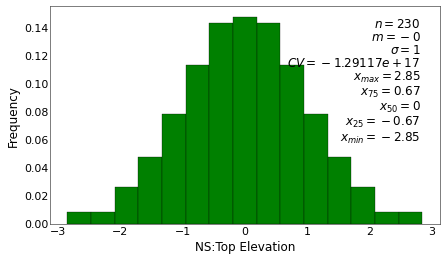

In [10]:
for var in dfl_ns.variables:
    if 'ns' in var.lower():
        gs.histogram_plot(dfl_ns, var=var, color='g', figsize = (7,4))